In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
print(os.getcwd())
os.chdir(r"..\..\..\Downloads")
print(os.getcwd())

C:\Users\Zachary Brown\Documents\GitHub\dsc
C:\Users\Zachary Brown\Downloads


In [3]:
data = pd.read_csv('Health_AnimalBites.csv')
data.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


In [34]:
for col in data.columns:
    print(data[col].value_counts())

2017-08-15    13
2014-04-26    12
2015-03-17    12
2010-04-01    12
2017-07-04    11
              ..
2014-12-14     1
2014-12-29     1
2015-01-03     1
2010-12-01     1
1985-05-05     1
Name: bite_date, Length: 2697, dtype: int64
DOG        6929
CAT        1533
BAT          76
RACCOON      21
OTHER         8
HORSE         5
FERRET        4
RABBIT        3
SKUNK         1
Name: SpeciesIDDesc, dtype: int64
PIT BULL           1081
GERM SHEPHERD       323
LABRADOR RETRIV     248
BOXER               181
CHICHAUHUA          164
                   ... 
BESINJI               1
BEARDED COLLIE        1
STAN POODLE           1
AMER FOX HOUND        1
IRISH WOLFHOUND       1
Name: BreedIDDesc, Length: 101, dtype: int64
MALE       3792
FEMALE     1992
UNKNOWN     620
Name: GenderIDDesc, dtype: int64
BLACK         663
BROWN         426
WHITE         389
BLK WHT       273
TAN           220
             ... 
WHT/SABLE       1
WH/BLACK        1
BL/WH/BROW      1
ORG/WHITE       1
BRONW           1
Nam

In [4]:
data['SpeciesIDDesc'].value_counts()

DOG        7029
CAT        1568
BAT         237
RACCOON      27
OTHER        11
HORSE         5
FERRET        4
RABBIT        3
SKUNK         1
Name: SpeciesIDDesc, dtype: int64

[]

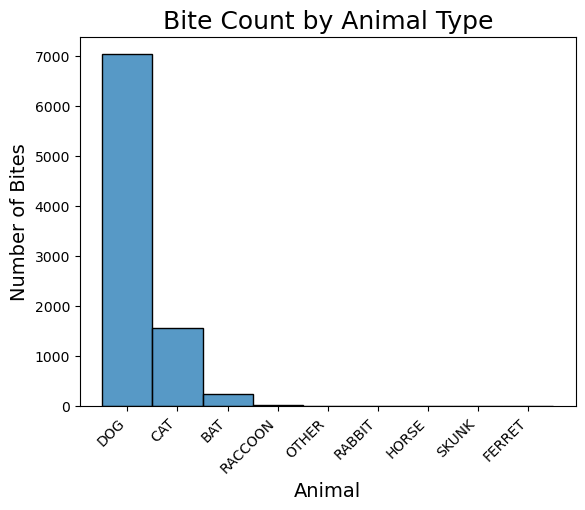

In [5]:
sns.histplot(data['SpeciesIDDesc'])
plt.ylabel('Number of Bites', size = 14)
plt.xlabel('Animal', size = 14)
plt.title('Bite Count by Animal Type', size = 18)
plt.xticks(rotation=45, ha='right')
plt.plot()

In [6]:
data['BreedIDDesc'].value_counts()

PIT BULL           1102
GERM SHEPHERD       327
LABRADOR RETRIV     253
BOXER               181
CHICHAUHUA          165
                   ... 
RED HEELER            1
BRIARD                1
CHOCOLATE LAB.        1
OLD ENG SHP DOG       1
IRISH WOLFHOUND       1
Name: BreedIDDesc, Length: 101, dtype: int64

In [7]:
dogs = data[data['SpeciesIDDesc'] == 'DOG']

In [8]:
dogs['BreedIDDesc'].value_counts()

PIT BULL           1101
GERM SHEPHERD       327
LABRADOR RETRIV     253
BOXER               181
CHICHAUHUA          165
                   ... 
RED HEELER            1
BRIARD                1
CHOCOLATE LAB.        1
OLD ENG SHP DOG       1
IRISH WOLFHOUND       1
Name: BreedIDDesc, Length: 101, dtype: int64

In [9]:
v = dogs['BreedIDDesc'].value_counts()
common_dogs = dogs[dogs['BreedIDDesc'].isin(v.index[v.gt(30)])]

[]

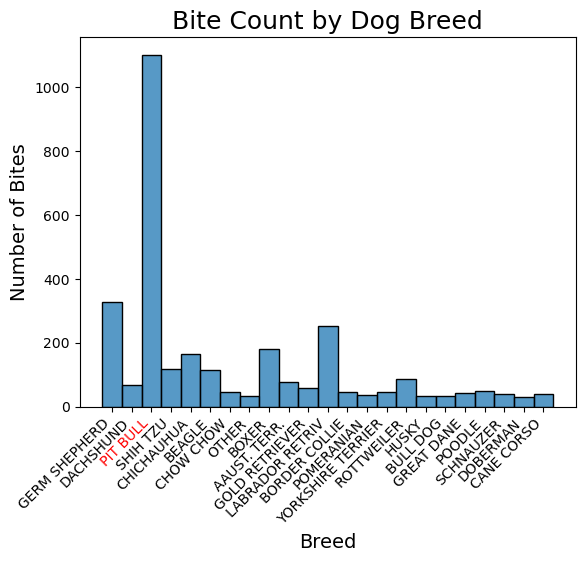

In [10]:
fig, ax = plt.subplots()
sns.histplot(common_dogs['BreedIDDesc'])
plt.ylabel('Number of Bites', size = 14)
plt.xlabel('Breed',size = 14)
plt.title('Bite Count by Dog Breed', size = 18)
plt.xticks(rotation=45, ha='right')
ax.get_xticklabels()[2].set_color("red")
plt.plot()

In [11]:
data['GenderIDDesc'].value_counts()

MALE       3832
FEMALE     2016
UNKNOWN     629
Name: GenderIDDesc, dtype: int64

In [12]:
data[data['bite_date'] > '2022']

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
1512,2101-02-18 00:00:00,CAT,NaN,FEMALE,BLACK,NaN,NaN,40202,NaN,BODY,2011-02-18 00:00:00,RELEASED,NaN,NaN,NaN
4490,5013-07-15 00:00:00,DOG,GERM SHEPHERD,FEMALE,WHITE,1.0,2013-08-05 00:00:00,40216,NaN,BODY,NaN,NaN,NaN,NaN,NaN
5055,2201-01-21 00:00:00,CAT,NaN,MALE,GRAY,NaN,NaN,NaN,NaN,HEAD,NaN,NaN,NaN,NaN,NaN
6293,2201-02-21 00:00:00,DOG,PIT BULL,MALE,TAN WHITE,1.0,2015-04-21 00:00:00,NaN,NaN,BODY,NaN,NaN,NaN,NaN,NaN
6505,2201-05-01 00:00:00,DOG,DACHSHUND,MALE,BROWN,1.0,2015-05-19 00:00:00,40229,NO,BODY,NaN,RELEASED,NaN,2015-05-11 00:00:00,NaN


In [17]:
data = data[data['bite_date'] <= '2022']
dogs = dogs[dogs['bite_date'] <= '2022']

In [18]:
data['ResultsIDDesc'].value_counts()

UNKNOWN     1235
NEGATIVE     131
POSITIVE       2
Name: ResultsIDDesc, dtype: int64

In [19]:
data['bite_date'] = pd.to_datetime(data['bite_date'])
data['head_sent_date'] = pd.to_datetime(data['head_sent_date'])
data['vaccination_date'] = pd.to_datetime(data['vaccination_date'])
data['quarantine_date'] = pd.to_datetime(data['quarantine_date'])

In [20]:
dogs['bite_date'] = pd.to_datetime(dogs['bite_date'])
dogs['head_sent_date'] = pd.to_datetime(dogs['head_sent_date'])
dogs['vaccination_date'] = pd.to_datetime(dogs['vaccination_date'])
dogs['quarantine_date'] = pd.to_datetime(dogs['quarantine_date'])

In [21]:
data['bite_to_test'] = data['head_sent_date'] - data['bite_date']
dogs['bite_to_test'] = dogs['head_sent_date'] - dogs['bite_date']

In [22]:
data['bite_to_test'].value_counts()

0 days       108
1 days        45
2 days        25
3 days         9
4 days         7
5 days         7
7 days         6
6 days         4
10 days        3
9 days         2
-2 days        1
-4 days        1
1096 days      1
369 days       1
-5 days        1
Name: bite_to_test, dtype: int64

In [23]:
dogs = dogs[dogs['bite_to_test'] >= '0 days']

In [24]:
dogs['bite_to_test'] = pd.to_numeric(dogs['bite_to_test'].dt.days, downcast='integer')

In [25]:
dogs.groupby(['BreedIDDesc']).mean()['bite_to_test']

BreedIDDesc
AAUST. TERR.          0.000000
AMER. BULL DOG        3.000000
BEAGLE                3.000000
BORDER COLLIE         1.000000
BOXER                 0.000000
BULL DOG              0.000000
CHOW CHOW             6.000000
DACHSHUND             0.000000
DALMATIAN             7.000000
GERM SHEPHERD         2.000000
GOLD RETRIEVER        5.000000
GREAT PYRENEESE       2.000000
HUSKY                 0.000000
LABRADOR RETRIV       4.000000
MASTIF                7.000000
PIT BULL             82.444444
SHIH TZU              2.000000
YORKSHIRE TERRIER     0.000000
Name: bite_to_test, dtype: float64

In [26]:
dogs['bite_to_test'].mean()

17.221052631578946

In [27]:
data['BreedIDDesc'].value_counts()

PIT BULL           1081
GERM SHEPHERD       323
LABRADOR RETRIV     248
BOXER               181
CHICHAUHUA          164
                   ... 
BESINJI               1
BEARDED COLLIE        1
STAN POODLE           1
AMER FOX HOUND        1
IRISH WOLFHOUND       1
Name: BreedIDDesc, Length: 101, dtype: int64

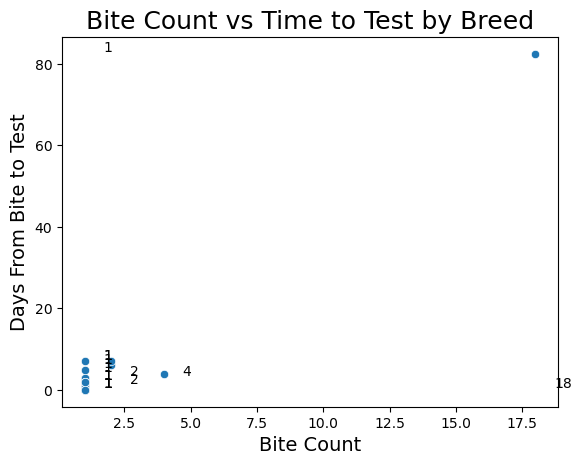

In [28]:
sns.scatterplot(dogs, x=dogs['BreedIDDesc'].value_counts(), y=dogs.groupby(['BreedIDDesc']).mean()['bite_to_test'])
for i, breed in enumerate (dogs['BreedIDDesc'].value_counts()):
    plt.annotate(breed, (dogs['BreedIDDesc'].value_counts()[i]+0.7, dogs.groupby(['BreedIDDesc']).mean()['bite_to_test'][i]+0.5) )

plt.xlabel('Bite Count', size = 14)
plt.ylabel('Days From Bite to Test', size = 14)
plt.title('Bite Count vs Time to Test by Breed', size = 18)
plt.show()

In [31]:
data['WhereBittenIDDesc'].value_counts()

BODY       6191
HEAD       1236
UNKNOWN     926
Name: WhereBittenIDDesc, dtype: int64